In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import PIL as pillow
from PIL import Image
from glob import glob
from tqdm.auto import tqdm
import os, sys, time


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler,
    LabelEncoder
)


import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore')

np.random.seed(12345)
tf.random.set_seed(12345)

In [4]:
from tensorflow.keras.datasets.mnist import load_data

df = load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [7]:
(X_train, y_train), (X_test, y_test) = df

In [10]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


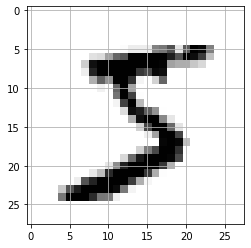

In [13]:
img = X_train[0]
plt.imshow(img, cmap=plt.cm.gray_r)
plt.grid()
plt.show()

In [14]:
def visual_multi(i):
    nplots = 40
    fig = plt.figure(figsize=(8, 4)) 
    for j in range(nplots):
        plt.subplot(4, 10, j+1)
        plt.imshow(X_train[i+j], cmap=plt.cm.gray_r)
        plt.title(y_train[i+j])
    plt.show()

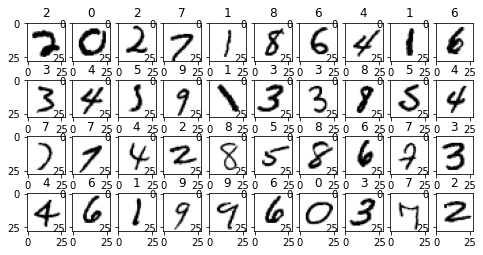

In [15]:
visual_multi(120)

In [16]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [18]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


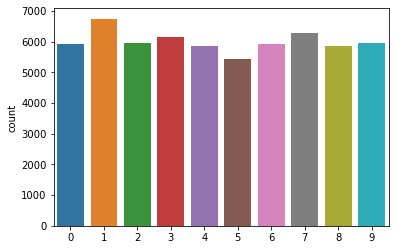

In [20]:
import seaborn as sns
sns.countplot(y_train)
plt.show()

In [21]:
model = Sequential()
model.add

In [24]:
num_classes = len(np.unique(y_train))

In [25]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=X_train.shape[1:])) 
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.5)) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5)) 

model.add(Dense(num_classes, activation='softmax'))

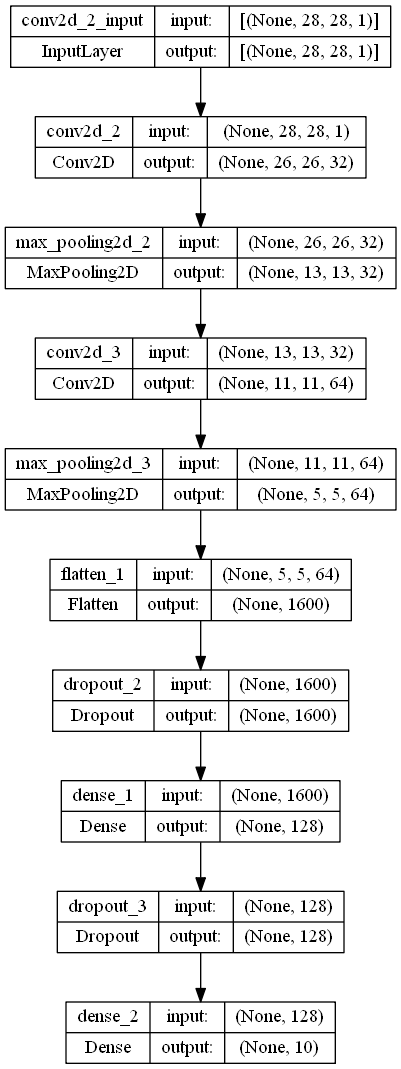

In [28]:
img = plot_model(model, 'digi.png', show_shapes=True, show_layer_names=True)
img

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
tqdm_callback = tfa.callbacks.TQDMProgressBar(show_epoch_progress=False)
history = model.fit(X_train, y_train, epochs=15, batch_size=128, verbose=1, validation_split=0.1) 

Epoch 1/15
422/422 [==============================] - 23s 53ms/step - loss: 1.7009 - accuracy: 0.7233 - val_loss: 0.1148 - val_accuracy: 0.9663
Epoch 2/15
422/422 [==============================] - 26s 61ms/step - loss: 0.3201 - accuracy: 0.9055 - val_loss: 0.0730 - val_accuracy: 0.9790
Epoch 3/15
422/422 [==============================] - 26s 62ms/step - loss: 0.2236 - accuracy: 0.9355 - val_loss: 0.0557 - val_accuracy: 0.9837
Epoch 4/15
422/422 [==============================] - 26s 61ms/step - loss: 0.1860 - accuracy: 0.9467 - val_loss: 0.0502 - val_accuracy: 0.9853
Epoch 5/15
422/422 [==============================] - 25s 60ms/step - loss: 0.1631 - accuracy: 0.9522 - val_loss: 0.0464 - val_accuracy: 0.9875
Epoch 6/15
422/422 [==============================] - 25s 59ms/step - loss: 0.1438 - accuracy: 0.9581 - val_loss: 0.0416 - val_accuracy: 0.9887
Epoch 7/15
422/422 [==============================] - 25s 60ms/step - loss: 0.1305 - accuracy: 0.9623 - val_loss: 0.0435 - val_accuracy:

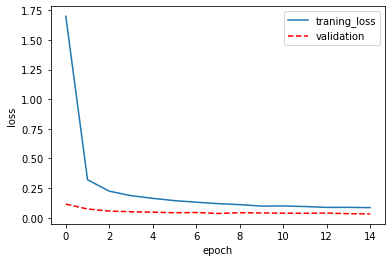

In [34]:
plt.plot(history.history['loss'], label='traning_loss')
plt.plot(history.history['val_loss'], 'r--', label='validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [33]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: {:.3f}'.format(score[1]))

313/313 [==============================] - 3s 8ms/step - loss: 0.0316 - accuracy: 0.9889
Accuracy: 0.989


In [117]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import rgb_to_grayscale

img = load_img('C:/Data_science/Computer_vision/Image_to_text/MNist_project/Dataset/7.png', target_size=(28, 28))

from PIL import Image, ImageOps

img = ImageOps.invert(img)
img = img_to_array(img)
img = rgb_to_grayscale(img)

print('shape=',img.shape)
print('max pixel value=',np.max(img))

shape= (28, 28, 1)
max pixel value= 254.97452


In [121]:
img = np.expand_dims(img, axis=0)

In [128]:
y_im_test = model.predict(img)
y_im_test.round(3)

1/1 [==============================] - 0s 21ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [131]:
predicted = np.argmax(y_im_test, -1)
print(predicted)

[7]


In [133]:
import pickle

pickle.dump((model), open('C:/Data_science/Computer_vision/Image_to_text/MNist_project/Ann_mnit.pickle', 'wb'))

INFO:tensorflow:Assets written to: ram://65447e00-833d-4bf4-9266-8adc7e9a2a04/assets


INFO:tensorflow:Assets written to: ram://65447e00-833d-4bf4-9266-8adc7e9a2a04/assets


In [134]:
model.save('C:/Data_science/Computer_vision/Image_to_text/MNist_project/Ann_mnit.h5')

In [135]:
model.save('C:/Data_science/Computer_vision/Image_to_text/MNist_project/Ann_mnit')

INFO:tensorflow:Assets written to: C:/Data_science/Computer_vision/Image_to_text/MNist_project/Ann_mnit\assets


INFO:tensorflow:Assets written to: C:/Data_science/Computer_vision/Image_to_text/MNist_project/Ann_mnit\assets


In [136]:
from tensorflow.keras.models import load_model

new_model = load_model('C:/Data_science/Computer_vision/Image_to_text/MNist_project/Ann_mnit')

In [139]:
y_test_new = new_model.predict(img)
predicted = np.argmax(y_test_new, -1)
print(predicted)

1/1 [==============================] - 0s 20ms/step
[7]
